<img src="http://www.cidaen.es/assets/img/mCIDaeNnb.png" alt="Logo CiDAEN" align="right">




<br><br><br>
<h2><font color="#00586D" size=4>Capstone IV</font></h2>



<h1><font color="#00586D" size=5><i>Machine Learning</i> applied to marketing</font></h1>

<br><br><br>
<div align="right">
<font color="#00586D" size=3>Luis de la Ossa</font><br>
<font color="#00586D" size=3>Master in Data Science and Data Engineering in the Cloud</font><br>
<font color="#00586D" size=3>University of Castilla-La Mancha</font>

</div>
<br>

---
<br>

<h2><font color="#00586D" size=5>Introduction</font></h2>
<br>




In this project, three assumptions are raised that are related to the area of ​​marketing and customer relationship management (_Customer Relationship Management_). The first consists of the development of a complete *pipeline* for the prediction of customer abandonment (_Churn prevention_). In the second, a model will be developed that allows estimating the potential value of a customer (_Customer Lifetime Value_). Finally, unsupervised learning will be used to segment a set of customers into groups.


Unlike the previous projects, which consisted exclusively of solving practical exercises, this one will also raise some questions related to the interpretation and analysis of the process, and which *will have to be answered in the notebook itself*.
<br>


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Note__: Although the project is easy, it is somewhat long since, in addition to quite a few exercises, abundant explanations and comments are provided about the process itself. Especially in the approach of the first exercise. We recommend reading them carefully.
</div>

---

<a id="indice"></a>
<h2><font color="#00586D" size=5>Index</font></h2>


*[1. Churn prevention (_churn prevention_)](#section1)* [1.1. Data exploration. Preprocessing](#section11)
    *[1.2. Building a model](#section12)* [1.3. Validation on new data](#section13)
    *[1.4. Comparison with other models](#section14)* [2. Predicting the potential value of a customer (_Customer Lifetime Value_)](#section2)
    *[2.1. Construction of a regression tree](#section21)* [3. Customer Segmentation](#section3)

In [1]:
# Configuración de la visualización
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

%matplotlib inline
#%config InlineBackend.figure_format = 'retina'


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section1"></a>
# <font color="#00586D"> 1. Churn prevention (_churn prevention_)</font>


<br> Churn prevention, or _Churn prevention_, is a _marketing_ task that consists of detecting
those customers who could abandon a certain service or market, and carry out specific retention campaigns in order to avoid loss.
<br>

This part of the project consists of the development of a model based on supervised learning (classification) for the detection of clients in this situation. A data set called `Telco-Customer-Churn.csv` is provided, relating to churn at a telecommunications operator, and obtained from the [IBM analytics](https://www.ibm.com/analytics) site. Some additional information, as well as _kernels_ that deal with this same data and may be useful (_it is recommended that you look at them_) are available at [Kaggle](https://www.kaggle. com/blastchar/telco-customer-churn).

In [2]:
# Carga los datos 
df_churn = pd.read_csv('data/churn/Telco-Customer-Churn.csv', index_col=0);

print("Tamaño del conjunto de datos:  %d" % df_churn.shape[0])
print("Número de variables: %d" % df_churn.shape[1])

if df_churn.index.is_unique:
    print('El índice es único.')
else:
    print('Los índices están duplicados.')
    
# Visualiza las primeras instancias
df_churn.head()

Tamaño del conjunto de datos:  7043
Número de variables: 20
El índice es único.


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<font size=2 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font> As a line of work, it will be assumed that the model is developed from a manageable set of labeled (historical) data, but it will be used on a current, unlabeled, and much larger data set. Due to this, the data set stored in `df_churn` will be divided into two: `df_churn` with 85% of the entries, and which will be used in the development (and validation) process. of the model; and `df_churn_new`, with the remaining 15%, which will allow both checking the correct definition of the workflow on new data and providing measures of model performance.

<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i> The data set `df_churn_new` __will not be used in any phase of the learning process__, not even for exploration, preprocessing, or model validation.
</div>

In [3]:
# Tamaño del conjunto de entrenamiento
training_size = int(len(df_churn)*0.85)

# Desordena los datos (esto es muy importante).
df_churn = df_churn.sample(frac=1, random_state=0)

# Copia los datos de test.
df_churn_new = df_churn.iloc[training_size:].copy()

# Copia los datos para el entrenamiento del modelo.
df_churn = df_churn.iloc[:training_size].copy()

print("Tamaño del conjunto de datos disponibles: ", len(df_churn))
print("Tamaño del conjunto de nuevos datos: ", len(df_churn_new))

Tamaño del conjunto de datos disponibles:  5986
Tamaño del conjunto de nuevos datos:  1057


In data science, it is common for the starting point of the work to be unknown data. The first step, *also when working with machine learning*, is to **explore this data**. In addition to familiarization with the problem (which is not always possible), as a result of the exploration, decisions arise that _mainly_ affect preparation and preprocessing.
<br>

In general, the exploration process is not systematic, but is carried out based on the information that the process itself provides, and is guided in part by the intuition and experience of the analyst. At each step, the need arises to make transformations to the original data for its use in building the predictive model. These changes can be made progressively. However, ***the entire process must be recorded in some way, since it must be reproduced for the processing of new data***that, in a real context, are acquired with the format from the original data set.
<br>

<font size=2 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font> Throughout the module we have studied how to make _pipelines_ or sequences of functions in `scikit-learn`. Although _this functionality is very useful_, incorporating the entire data process into a `scikit-learn` _pipeline_ can be tedious, and there may even be limitations that prevent it or make an alternative way of working advisable. In fact, _it is possible to separate (and anticipate) some data preparation tasks_ from the process defined in the `scikit-learn` _pipeline_. Thus, operations such as the elimination or transformation of columns, whose application on new data is _totally independent of training_, can be defined and carried out in a `pandas` _pipeline_, prior to the construction (and use) of the classification model.
<br>

<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i> Examples of operations that depend on training are standardization or replacing missing values ​​with the mean/median. These must be part of the*pipeline*of `scikit-learn` since they involve instantiating a transformer.
</div>

This project proposes a way of working in which successively, _during exploration_, preprocessing functions will be applied to a _DataFrame_. These functions will be stored in a list that, finally, can be used to create the `pandas` _pipeline_ that implements the sequence of preprocessing actions on new data. Once a suitable version of the data is available, work with `scikit-learn` will be done according to the usual procedure.


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Note__: The proposed working mode __is not the only one, but it is an alternative__ that may be convenient in some cases, and different from those seen in class (implementation of transformers). On the other hand, this task focuses on the construction of models, so __the exploration part has been reduced to the essential minimum__. However, you can include additional steps in this regard if you see fit.
</div>

Considering the approach described, it is necessary to record the transformations that will be done on the*DataFrame*and the treatment that will finally be done to each variable within the*pipeline*of `scikit-learn`. For this, three lists will be used:* `churn_data_prep_pipeline`, which will save the sequence of transformation functions (references) applied to the_DataFrame_.

* `cat_features`, which will store the names of the columns that contain discrete values, and that are to be treated as categorical in the _pipeline_ of `scikit-learn`.

* `num_features`, which will store the names of the columns that are to be treated as numeric in the `scikit-learn`_pipeline_.

In [4]:
# Lista de funciones aplicadas en la preparación de los datos
churn_data_prep_pipeline = []

# Características que serán consideradas categóricas y numéricas en el pipeline
cat_features = []
num_features = []

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section11"></a>
## <font color="#00586D"> 1.1 Data exploration. Preprocessing. </font>
<br>


The main objective of this work is to predict the cancellation of a certain user using a classification model. Therefore, one of the most important steps in exploration consists of the analysis and interpretation of the distribution of classes. This factor may be of interest in training, but also for evaluation.

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 1 </font>
Draw a bar plot (`sns.catplot()` or `sns.countplot()`) with the distribution of the classes (`Churn` column) over the samples. Obtain their possible values. Comment on what is seen in the graph, how this may affect the performance of the classifier, and if this influences the way in which the evaluation is to be carried out.

Clases:  ['No' 'Yes']
El porcentaje de muestras positivas es 0.27


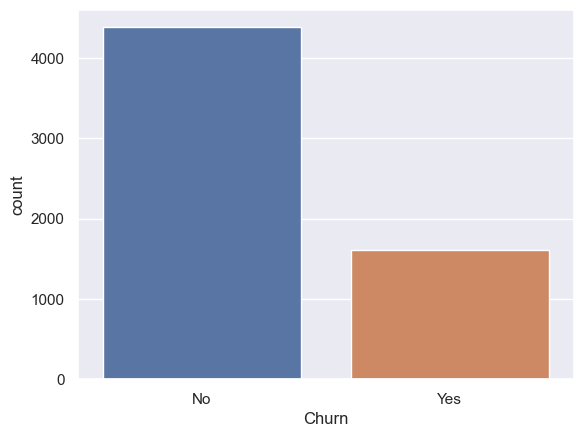

In [5]:
#
sns.countplot(data=df_churn, x=df_churn['Churn'])
#

print("Clases: ", df_churn['Churn'].unique())
print(f"El porcentaje de muestras positivas es {(sum(df_churn['Churn']=='Yes') / df_churn.shape[0]):.2f}")

___Answer___
<br><br>
Because the percentage of positive samples is 27%, we find that the problem is unbalanced and therefore it will be necessary to stratify

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

It can be seen that the classes are coded as _Strings_. To work with `scikit-learn` you need to convert them to numerical format.

<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
This step will not be included in the _pipeline_. The reason is that (as discussed above) once designed, it should be implemented for processing new data that ___does___ contain information related to the class.
</div>

The column corresponding to the class is then converted to numeric format.

In [6]:
df_churn['Churn'] = (df_churn['Churn']=='Yes').astype(int)
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
6296-DDOOR,Female,0,No,No,19,Yes,No,DSL,No,Yes,No,No,Yes,No,One year,No,Electronic check,58.20,1045.25,0
3680-CTHUH,Male,0,No,No,60,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),116.60,7049.5,0
4931-TRZWN,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,71.95,923.85,0
8559-WNQZS,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.45,20.45,0
3537-HPKQT,Female,0,Yes,No,55,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),77.75,4266.4,0


Once the class has been explored, we proceed with the characteristics, for which the types will be checked first.

In [7]:
df_churn.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int32
dtype: object

It can be seen that there are columns of integers, floats and also _Strings_ (objects). The columns will be divided by type, and each group will be examined and treated separately.

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
In this case study we can proceed like this, since **the number of variables is manageable**. In cases with more variables, a more superficial exploration would have to be done, and general methods should be defined.
</div>
<br>

The names of the numeric columns of the _DataFrame_ are then stored in a list called `num_df_columns`, and the rest in another called `cat_df_columns `.



<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
***Note*** that these lists are different from `num_features` and `cat_features`, which contain the names of the features depending on*how they will ultimately be treated* in the _pipeline_ of `scikit-learn`.
</div>
<br>

In [8]:
dis_df_columns = df_churn.select_dtypes(exclude=np.number).columns
num_df_columns = df_churn.select_dtypes(include=np.number).columns

print('Discretas: ',dis_df_columns)
print('\nNuméricas: ',num_df_columns)

Discretas:  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')

Numéricas:  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn'], dtype='object')


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> We will begin by treating discrete variables, since sometimes it is convenient to convert them to numerical ones, and then they can be included in the exploration and analysis of numerical variables.
</div>


<br>

### <font color="#00586D">Treatment of discrete columns </font>


 
<font size=2 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font> In relation to these columns, two very relevant aspects when building a model with `scikit-learn` are: the number of values ​​that each one can take; and if there is an order relationship between these values. These factors determine the type of transformation that has to be done. There are ***four possibilities***:* When the column takes two values, it can be binarized and converted to numeric directly.
*If the size of the set of values ​​is greater than two, and there is no order relationship between them, _One Hot Encoding_ is applied (it will be applied later in the*pipeline*of transformations).* If an order relationship exists, the values ​​are transformed to numeric, replacing each value with its order.
* If the extremely large set of values ​​has to be scanned, it is very possible that this is an identifier, or an error.

Next, the number of values ​​for each of the discrete variables is obtained and stored in a list called `num_values_dis_df_col`. Each element in the list is a tuple with the column name and the number of variables.

In [9]:
num_values_dis_df_col = list(map(lambda col: (col,len(df_churn[col].value_counts())), dis_df_columns))
num_values_dis_df_col

[('gender', 2),
 ('Partner', 2),
 ('Dependents', 2),
 ('PhoneService', 2),
 ('MultipleLines', 3),
 ('InternetService', 3),
 ('OnlineSecurity', 3),
 ('OnlineBackup', 3),
 ('DeviceProtection', 3),
 ('TechSupport', 3),
 ('StreamingTV', 3),
 ('StreamingMovies', 3),
 ('Contract', 3),
 ('PaperlessBilling', 2),
 ('PaymentMethod', 4),
 ('TotalCharges', 5608)]

#### <font color="#00586D"> Binary variables </font>

As discussed above, discrete variables that take two values ​​can be binarized directly, except in the case of not providing useful information, which can be eliminated.

From the list `num_values_dis_df_col` the names of the binary columns are obtained and stored in a list called `dis_df_col_bin` .

In [10]:
dis_df_col_bin = list(map(lambda cv: cv[0],(filter(lambda cv: cv[1]==2,num_values_dis_df_col))))
dis_df_col_bin

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 2</font>
Draw the distribution of each of these variables using a graph of type `sns.countplot()` for each of them. It is also possible to display the class variable (with `hue='Churn', dodge=False`).

 
<font size=2 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font> In this exercise a figure is created with four graphs, and in each of them you have to draw the `sns.countplot()` corresponding to each of the columns, using the color of the graph to distinguish the variable ` Churn`.

<AxesSubplot: xlabel='PaperlessBilling', ylabel='count'>

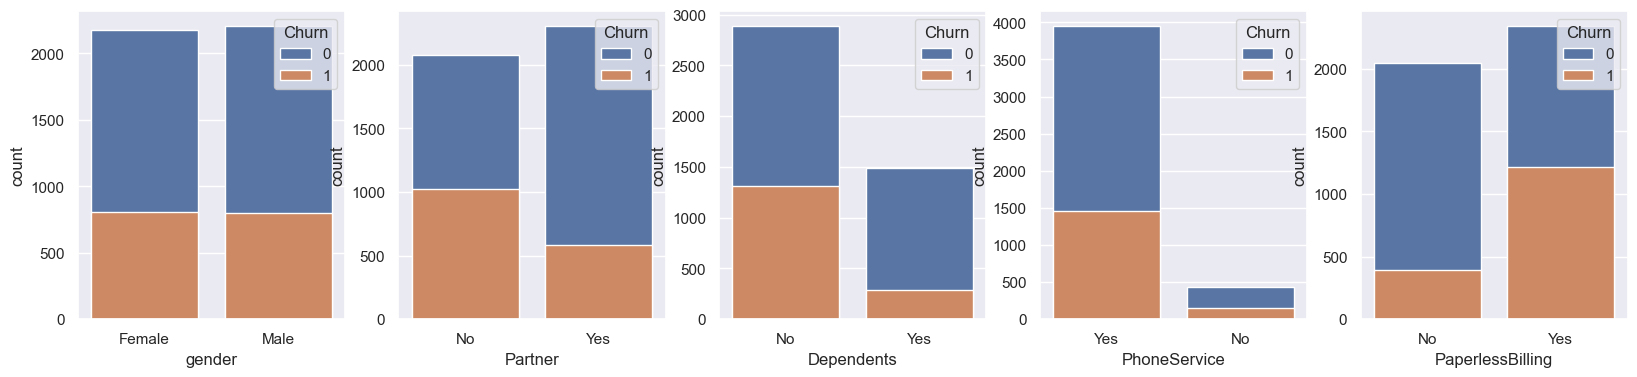

In [11]:
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

#
sns.countplot(x=df_churn['gender'],data=df_churn, hue='Churn', dodge=False, ax=axs[0])
sns.countplot(x=df_churn['Partner'],data=df_churn, hue='Churn', dodge=False, ax=axs[1])
sns.countplot(x=df_churn['Dependents'],data=df_churn, hue='Churn', dodge=False, ax=axs[2])
sns.countplot(x=df_churn['PhoneService'],data=df_churn, hue='Churn', dodge=False, ax=axs[3])
sns.countplot(x=df_churn['PaperlessBilling'],data=df_churn, hue='Churn', dodge=False, ax=axs[4])
#

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Regardless of how relevant they may be when classifying, it seems that all the variables and their values ​​make sense, so they will be preserved.

The next function, `churn_binarize_dis`, receives a _DataFrame_ and transforms the columns of `dis_df_col_bin` to a binary integer.

In [12]:
# Para gender --> Male=0, Female=1
# Pare el resto: --> No=0, Yes=1
def churn_binarize_dis(df):
    df['gender'] = (df['gender']=='Female').apply(int)
    df['Partner'] = (df['Partner']=='Yes').apply(int)
    df['Dependents'] = (df['Dependents']=='Yes').apply(int)
    df['PhoneService'] = (df['PhoneService']=='Yes').apply(int)
    df['PaperlessBilling'] = (df['PaperlessBilling']=='Yes').apply(int)
    return df # No hace falta

# Comprueba si la función está bien sobre una copia de los datos
display(churn_binarize_dis(df_churn.head(5).copy()))

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
6296-DDOOR,1,0,0,0,19,1,No,DSL,No,Yes,No,No,Yes,No,One year,0,Electronic check,58.20,1045.25,0
3680-CTHUH,0,0,0,0,60,1,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,1,Credit card (automatic),116.60,7049.5,0
4931-TRZWN,1,0,0,0,13,1,No,DSL,Yes,No,No,No,Yes,Yes,Month-to-month,1,Electronic check,71.95,923.85,0
8559-WNQZS,0,0,0,0,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,20.45,20.45,0
3537-HPKQT,1,0,1,0,55,1,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,1,Credit card (automatic),77.75,4266.4,0


The `churn_binarize_dis` function is then applied to the data, and `churn_data_prep_pipeline` is added to the list of preprocessing actions.

In [13]:
# Lo aplica
churn_binarize_dis(df_churn)

# Lo añade.
churn_data_prep_pipeline.append(churn_binarize_dis)

Originally discrete variables that have been transformed to binary must be treated as numeric, so they are added to the `num_features` list.

In [14]:
# Añade las variables
num_features.extend(dis_df_col_bin)
# Muestra las variables numéricas
print('Variables numéricas: ', num_features)

Variables numéricas:  ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']


#### <font color="#00586D"> Categorical variables </font>

Discrete variables that take more than two values ​​can be treated as categorical with _One Hot Encoding_ (later) or, if ordinal, transformed to numeric. First of all, we must explore the type and distribution of values ​​of each of them, and see if they can be considered ordinal.

From `num_values_dis_df_col`, the names of discrete columns that have more than two values ​​and less than five can be obtained. They will be stored in a list named `dis_df_columns_cat`.

In [15]:
dis_df_columns_cat = list(map(lambda cv: cv[0],(filter(lambda cv: cv[1]>2 and cv[1]<5, num_values_dis_df_col))))
dis_df_columns_cat

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 3</font>

Draw the distribution of each of these variables using a graph of type `sns.countplot()`. For each of them to check that all the values ​​are correct.

<font size=2 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font> This exercise is similar to the previous one. It involves creating a figure with ten graphs, one per column, and drawing a graph in each of them.

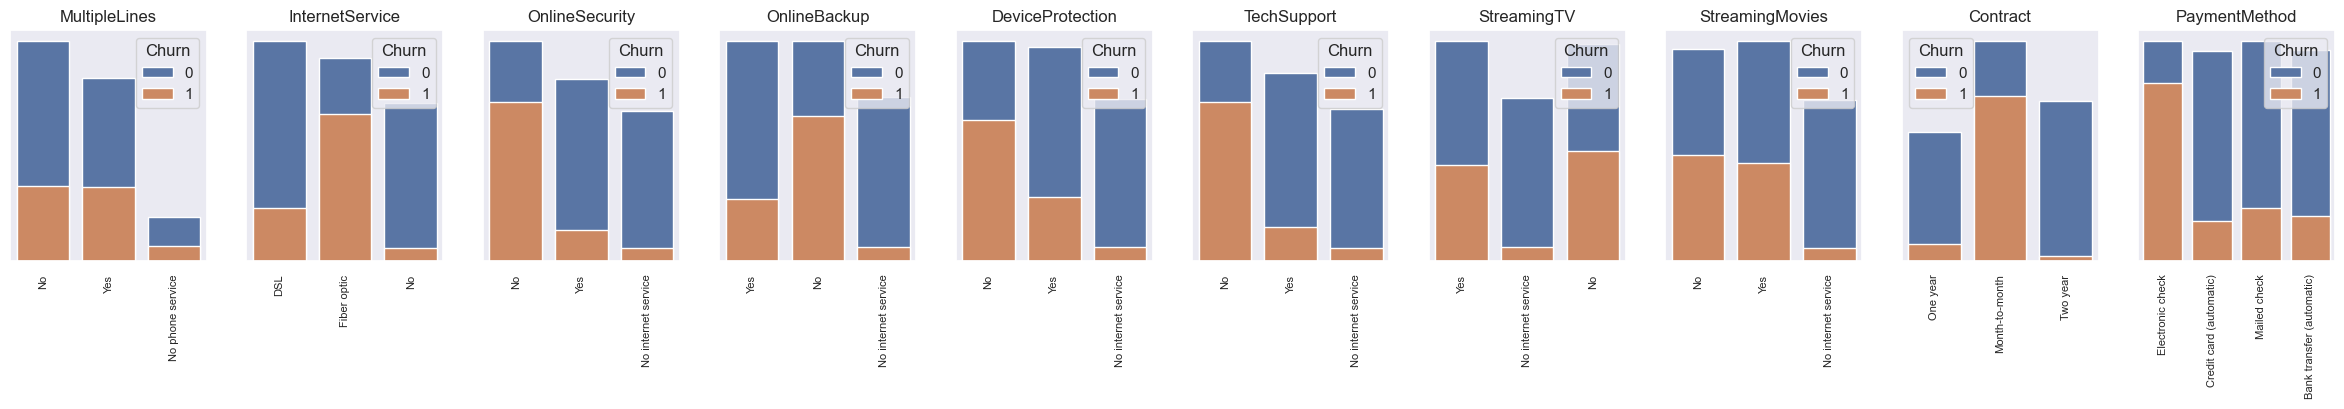

In [16]:
fig, axs = plt.subplots(1, 10, figsize=(30, 3))

for col, ax in enumerate(axs.flatten()):
    
    col_name = dis_df_columns_cat[col]
    sns.countplot(x=col_name,data=df_churn, hue='Churn', dodge=False, ax=ax)
    

    # Para que se vean mejor
    ax.set_title(col_name)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
    ax.set_yticks([])
    ax.set_xlabel(None)
    ax.set_ylabel(None)

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 4</font>

Explore these variables (one at a time) using `sns.countplot()`, using hue to relate the variables to `Churn` (with `hue='Churn', dodge=False`). Which variable or variables seem most relevant? Draw only one graph at a time, and finally leave only the one corresponding to the most relevant variable (if any) and comment on why it is so.

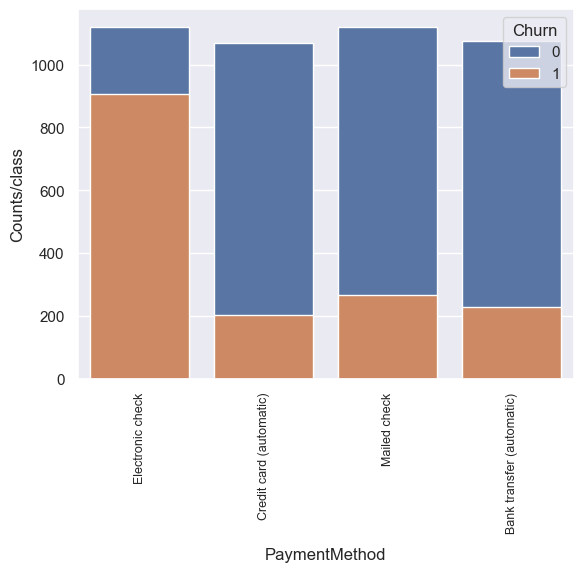

In [17]:
col_name = "PaymentMethod"

#
sns.countplot(x=col_name,data=df_churn, hue='Churn', dodge=False)
#

plt.xticks(rotation=90, fontsize=9)
plt.xlabel(col_name, labelpad=10)
plt.ylabel('Counts/class')
plt.show()

___Answer:___

The most relevant variable for this study is PaymentMethod since we have a similar number of clients for each payment method, but it is observed that the majority of clients abandon if their payment is electronic check, while for the rest of the payments a low number is observed. of abandonments. It is also observed that the InternetService variable could be relevant since customers with fiber optics tend to leave the company, as well as the TechSupport variable, in which it is observed that customers who have not had technical support have left the company.

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

In principle, it seems that all columns could be treated as categorical, although the `Contract` column _could_ be considered ordinal. Therefore, all variables except `Contract` will be added to the `cat_features` list.

In [18]:
cat_features = dis_df_columns_cat[:] # Copia la lista
cat_features.remove('Contract')      # Borra Contract
cat_features

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaymentMethod']

The `churn_transform_contract` function takes as input a *DataFrame* and converts the `Contract` column to numeric by assigning the values ​​from the dictionary `con_to_ordinal `.

In [19]:
con_to_ordinal = {'Month-to-month':1, 'One year':2, 'Two year':3}

def churn_transform_contract(df):
    df['Contract'] = df['Contract'].map(con_to_ordinal)
    
    return df # No hace falta

# Comprueba si la función está bien
display(churn_transform_contract(df_churn.head(5).copy()))

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
6296-DDOOR,1,0,0,0,19,1,No,DSL,No,Yes,No,No,Yes,No,2,0,Electronic check,58.20,1045.25,0
3680-CTHUH,0,0,0,0,60,1,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,2,1,Credit card (automatic),116.60,7049.5,0
4931-TRZWN,1,0,0,0,13,1,No,DSL,Yes,No,No,No,Yes,Yes,1,1,Electronic check,71.95,923.85,0
8559-WNQZS,0,0,0,0,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,0,Mailed check,20.45,20.45,0
3537-HPKQT,1,0,1,0,55,1,Yes,Fiber optic,No,Yes,No,No,No,No,1,1,Credit card (automatic),77.75,4266.4,0


#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 5</font>

For this variable, an assignment of values ​​` {'Month-to-month':1, 'One year':2, 'Two year':3}` has been made. In addition to being intuitive, it seems consistent with the information shown in the graph. Because?

___Answer:___

Because the Month to Month value is the one that generates the greatest customer loss and the Two year value is the one that generates the least customer loss for the company, while the One year value is between the two. Therefore, it makes sense to mark Month to Month as 1 since it is the value that we will have to focus on the most since it generates the greatest losses and two year as 3 since it is the one that generates the least losses and we will focus on the least.

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

At this point, you should add the `churn_transform_contract` function to `churn_data_prep_pipeline`, apply it to the `DataFrame` `df_churn`.

In [20]:
# Lo aplica
churn_transform_contract(df_churn)

# Lo añade.
churn_data_prep_pipeline.append(churn_transform_contract)

On the other hand, `Contract` will be treated as a numeric variable, so it is added to `num_features`.

In [21]:
# Añade las variables
num_features.append('Contract')

# Las muestra
print('Variables numéricas: ', num_features)

Variables numéricas:  ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Contract']


#### <font color="#00586D"> Total Charges </font>

The `TotalCharges` column, although represented as an object, contains numeric data. Because of this, it will be transformed into numeric, assigning `NaN` values ​​to the entries that could not be transformed into numeric when reading the *DataFrame*. The `churn_charges_to_numeric` function takes as input a *DataFrame* and converts the `TotalCharges` column to numeric.

In [22]:
def churn_charges_to_numeric(df):
    df['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')
    return df # No hace falta

# Comprueba si la función está bien
display(churn_charges_to_numeric(df_churn.head(5).copy()))

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
6296-DDOOR,1,0,0,0,19,1,No,DSL,No,Yes,No,No,Yes,No,2,0,Electronic check,58.20,1045.25,0
3680-CTHUH,0,0,0,0,60,1,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,2,1,Credit card (automatic),116.60,7049.50,0
4931-TRZWN,1,0,0,0,13,1,No,DSL,Yes,No,No,No,Yes,Yes,1,1,Electronic check,71.95,923.85,0
8559-WNQZS,0,0,0,0,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,0,Mailed check,20.45,20.45,0
3537-HPKQT,1,0,1,0,55,1,Yes,Fiber optic,No,Yes,No,No,No,No,1,1,Credit card (automatic),77.75,4266.40,0


The `churn_charges_to_numeric` function also adds `churn_data_prep_pipeline` and applies `df_churn`.

In [23]:
# Lo aplica
churn_charges_to_numeric(df_churn)

# Lo añade.
churn_data_prep_pipeline.append(churn_charges_to_numeric)

`TotalCharges` must be included in the list of numeric columns, `num_features`.

In [24]:
# Añade las variables
num_features.append('TotalCharges')

# Las muestra
print('Variables numéricas: ', num_features)

Variables numéricas:  ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Contract', 'TotalCharges']


So far, these are the steps that have been carried out in preprocessing.

In [25]:
print("\nPasos de preprocesamiento: ")
for step, function in enumerate(churn_data_prep_pipeline):
    print("\t {:d}: {:s}".format(step, function.__name__))


Pasos de preprocesamiento: 
	 0: churn_binarize_dis
	 1: churn_transform_contract
	 2: churn_charges_to_numeric


And these are the characteristics (*originally discrete*) that will be treated as categorical and as numerical.

In [26]:
print('Variables que se tratarán como categóricas: \n\t',cat_features, end='\n\n')
print('Variables que se tratarán como numéricas: \n\t',num_features)

Variables que se tratarán como categóricas: 
	 ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod']

Variables que se tratarán como numéricas: 
	 ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Contract', 'TotalCharges']


### <font color="#00586D">Treatment of numeric columns </font>
<br>

The treatment of numerical columns is relatively simple, and can be decomposed into several stages:

*Check that, indeed, they correspond to numerical characteristics.* Detection and treatment of outliers.
*Detection and treatment of missing values.* Exploration of variables.

<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
This is a possible decomposition, and should be considered as a suggestion. If *outliers* are replaced by missing values, they must be treated before these.
</div>

#### <font color="#00586D"> Type checking </font>

In some cases, numerical columns can represent categorical features. To detect this situation, it is possible to rely, in addition to the (descriptive) name of the columns, on the number of values ​​they take.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> Another option is to create graphs (but they will be done later because in this case it is not necessary).
</div>

Next, the number of values ​​is obtained for each of the variables that have been stored as numeric in the original *DataFrame* (`num_df_columns`).

In [27]:
list(map(lambda col: "{:s}: {:d}".format(col,len(df_churn[col].value_counts())), num_df_columns))

['SeniorCitizen: 2', 'tenure: 73', 'MonthlyCharges: 1529', 'Churn: 2']

It seems two of the variables are binary, and two others are numerical, so no changes need to be made.

#### <font color="#00586D"> Outliers </font>


There are several methods to carry out outlier detection. For example, in the event that the number of characteristics is small, and the scales are similar, a box plot could be used. Another possibility is to visualize the ranges that the variables take.

In [28]:
df_churn[num_df_columns.to_list()+['TotalCharges']].describe(percentiles=[0.01,0.25,0.5,0.75,0.99])

,SeniorCitizen,tenure,MonthlyCharges,Churn,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000,5977.000000
mean,0.166889,32.186435,64.821024,0.267959,2273.195483
std,0.372908,24.503081,30.033744,0.442933,2258.880108
min,0.000000,0.000000,18.250000,0.000000,18.800000
1%,0.000000,1.000000,19.150000,0.000000,19.850000
25%,0.000000,9.000000,35.825000,0.000000,400.000000
50%,0.000000,28.000000,70.400000,0.000000,1396.250000
75%,0.000000,55.000000,89.850000,1.000000,3772.650000
99%,1.000000,72.000000,114.557500,1.000000,8027.362000
max,1.000000,72.000000,118.750000,1.000000,8684.800000


It seems that the minimum and maximum values ​​in the `tenure`, `MonthyCharges` and `TotalCharges` variables do not stray excessively from reasonable ranges in any case. Therefore, there is no need to proceed in this case.

#### <font color="#00586D"> Missing values ​​</font>


Next, it is checked if there are missing values ​​for any of the numerical variables.

In [29]:
df_churn[num_df_columns.to_list()+['TotalCharges']].isna().any()

SeniorCitizen     False
tenure            False
MonthlyCharges    False
Churn             False
TotalCharges       True
dtype: bool

It can be seen that there are only them for `TotalCharges`.

<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
The treatment of missing values ​​is convenient to do in the _pipeline_ of `scikit-learn`, since in many cases the mean or median of the variable in the training set will be used, and this value has been to store.
</div>

#### <font color="#00586D"> </font> scan


Finally, it may be of interest to carry out a small exploration of the numerical variables to see both their distributions and their relationship with the class. It is important to remember that previously some discrete variables were converted to numerical ones. Therefore, the `num_features` list will be updated, adding the elements of `num_df_colums`, that is, the columns that were initially numeric.

In [30]:
num_features = num_features + num_df_columns.to_list()  
num_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Contract',
 'TotalCharges',
 'SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'Churn']

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 6</font>

Draw, for the variables `tenure`, `MonthlyCharge` and `TotalCharges` (which are not binary), a graph of type `sns.kdeplot()` that shows the distribution of values ​​for each of the classes (two distributions by graph). Use a figure from $1 \times 3$ graphics. Comment on what is observed in the graph.

<font size=2 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font> In this case three graphs must be drawn. In each of them the distribution of the column values ​​is represented, but color is used to differentiate between the two categories that `Churn` can take.

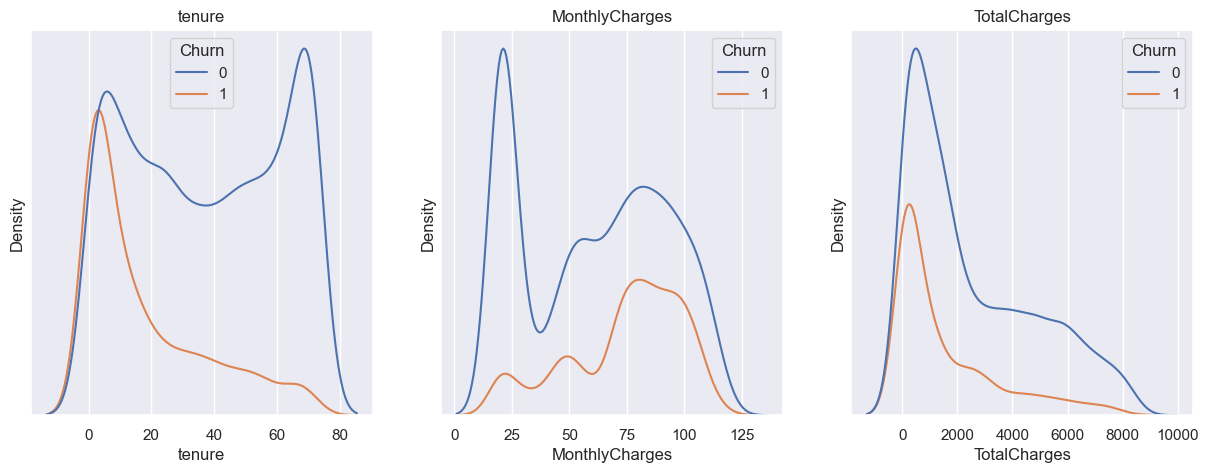

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
features = ['tenure', 'MonthlyCharges','TotalCharges']
for col, ax in enumerate(axs.flatten()):
    col_name = features[col]
    
    #
    sns.kdeplot(x=col_name,data=df_churn, hue='Churn', ax=ax)
    #
    
    ax.set_title(col_name);    
    ax.set_yticks([])

___Answer:___

For the tenure variable, a density peak is observed for the category Churn=yes for an approximate value of 5, while for the category Churn=No two main peaks are observed, one for an approximate value of 10 and another for an approximate value of 70.
For the variable MonthlyCharges category Churn=Yes, three density peaks are observed located at the approximate values ​​of 20, 50 and 80, where the highest peak is found at the approximate value of 80. For the category Churn=No, three peaks are observed located at approximate values ​​of 20 (where we find the highest peak), 55 and 85.
For the variable TotalCharges category Churn=yes we observe a main peak at the approximate value of 100 and for the category Churn=No we observe a density peak at a similar value but with a higher density. Thus, the density graph for the Churn=No category shows a flattened part between the values ​​3000-6000.

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 7</font>
Calculate the correlation between numerical variables and display it on a `sns.heatmap()` graph.

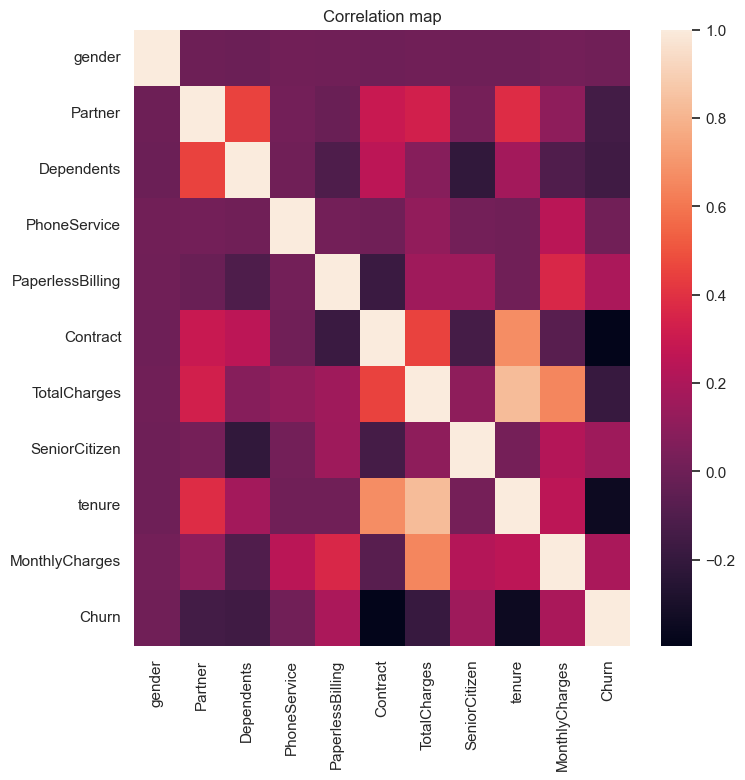

In [32]:
corrmat = df_churn[num_features].corr(method='pearson')

# Mapa de calor con seaborn
plt.figure(figsize=(8,8))
#
sns.heatmap(corrmat)
# 
plt.title("Correlation map")
plt.show()

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 8</font>

Comment on what is observed in the graph (whether or not any relevant circumstance is observed).

___Answer:___

The graph shows light colors for a high correlation and that is why the light-colored diagonal exists, since the correlation of a variable with itself is 1. In addition, it is shown that the TotalCharges variable is highly correlated to the tenure variable, and that the tenure and contract variables are also correlated but to a lesser extent, as are the TotalCharges and MonthlyCharges variables.

Other variables have a lower correlation (and therefore the color is darker), such as Dependents and Partner, Partner and tenure, PaperlessBilling and MonthlyCharges, Contract and TotalCharges.

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<br>

### <font color="#00586D">Preprocessing</font>
<br>

At this point, the necessary preprocessing actions have been carried out. In the resulting _DataFrame_ there are numerical characteristics, as well as categorical ones, which will be treated as such in subsequent steps. Regarding numerics, `Churn` must be removed.

In [33]:
num_features.remove('Churn')

print("Variables numéricas: ")
print(num_features)
print("\nVariables categóricas")
print(cat_features)

df_churn.head()

Variables numéricas: 
['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Contract', 'TotalCharges', 'SeniorCitizen', 'tenure', 'MonthlyCharges']

Variables categóricas
['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
6296-DDOOR,1,0,0,0,19,1,No,DSL,No,Yes,No,No,Yes,No,2,0,Electronic check,58.20,1045.25,0
3680-CTHUH,0,0,0,0,60,1,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,2,1,Credit card (automatic),116.60,7049.50,0
4931-TRZWN,1,0,0,0,13,1,No,DSL,Yes,No,No,No,Yes,Yes,1,1,Electronic check,71.95,923.85,0
8559-WNQZS,0,0,0,0,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,0,Mailed check,20.45,20.45,0
3537-HPKQT,1,0,1,0,55,1,Yes,Fiber optic,No,Yes,No,No,No,No,1,1,Credit card (automatic),77.75,4266.40,0


In relation to preprocessing, the following functions have been successively applied (all three must appear).

In [34]:
print("\nPasos de preprocesamiento: ")
for step, function in enumerate(churn_data_prep_pipeline):
    print("\t {:d}: {:s}".format(step, function.__name__))


Pasos de preprocesamiento: 
	 0: churn_binarize_dis
	 1: churn_transform_contract
	 2: churn_charges_to_numeric


The following function, called `preprocess_data`, accepts as parameters a_DataFrame_and a list of functions like the previous one, and applies them successively on the_DataFrame_.

In [35]:
def preprocess_data(df, churn_data_prep_pipeline):
    for function in churn_data_prep_pipeline:
        function(df)
    return df

The following cell applies the `preprocess_data` function on an auxiliary_DataFrame_. As can be seen, the format returned is similar to that of `df_churn` once the preprocessing is done.

In [36]:
df_aux = pd.read_csv('data/churn/Telco-Customer-Churn.csv', index_col=0).sample(n=5, random_state=0)
preprocess_data(df_aux, churn_data_prep_pipeline)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
6296-DDOOR,1,0,0,0,19,1,No,DSL,No,Yes,No,No,Yes,No,2,0,Electronic check,58.20,1045.25,No
3680-CTHUH,0,0,0,0,60,1,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,2,1,Credit card (automatic),116.60,7049.50,No
4931-TRZWN,1,0,0,0,13,1,No,DSL,Yes,No,No,No,Yes,Yes,1,1,Electronic check,71.95,923.85,No
8559-WNQZS,0,0,0,0,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,0,Mailed check,20.45,20.45,No
3537-HPKQT,1,0,1,0,55,1,Yes,Fiber optic,No,Yes,No,No,No,No,1,1,Credit card (automatic),77.75,4266.40,No


Another alternative to implement the preprocessing pipeline is to build the pipeline after the fact using `DataFrame.pipe()`.

In [37]:
df_aux = pd.read_csv('data/churn/Telco-Customer-Churn.csv', index_col=0).sample(n=5, random_state=0)

def preprocess_data_pipe(df):
    return (df.pipe(churn_binarize_dis).
               pipe(churn_transform_contract).
               pipe(churn_charges_to_numeric))


preprocess_data_pipe(df_aux)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
6296-DDOOR,1,0,0,0,19,1,No,DSL,No,Yes,No,No,Yes,No,2,0,Electronic check,58.20,1045.25,No
3680-CTHUH,0,0,0,0,60,1,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,2,1,Credit card (automatic),116.60,7049.50,No
4931-TRZWN,1,0,0,0,13,1,No,DSL,Yes,No,No,No,Yes,Yes,1,1,Electronic check,71.95,923.85,No
8559-WNQZS,0,0,0,0,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,0,Mailed check,20.45,20.45,No
3537-HPKQT,1,0,1,0,55,1,Yes,Fiber optic,No,Yes,No,No,No,No,1,1,Credit card (automatic),77.75,4266.40,No


<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section12"></a>
## <font color="#00586D"> 1.2. Building an </font> model
<br>

At this point, a flow of preprocessing actions has been defined, and a _DataFrame_ has been prepared from which the model can be built and validated. This data set will be the starting point for defining a _Pipeline_ with `scikit-learn`, which also includes certain transformation actions, and is "independent" of the previous process. However, it will be necessary to use the lists of characteristics prepared previously. On the other hand, the input columns will be stored in `X` and the class in `y`.

In [38]:
X = df_churn.drop('Churn',axis=1)
y = df_churn['Churn']

### <font color="#00586D"> Creating a Pipeline for the </font> transformation


The first step in creating the _Pipeline_ consists of transforming the data. One of the problems that has traditionally been dealt with in this sense is that the data from different columns must be treated separately, which must then be joined. This involves the implementation of transformers. Since version 0.20 `scikit-learn` provides the object [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer), which allows the columns to be treated separately, and greatly facilitates the transformation task.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> You can read a couple of articles about `ColumnTransformer` in these links: [post 1](https://medium.com/vickdata/easier-machine-learning-with-the-new-column-transformer-from-scikit- learn-c2268ea9564c) (basic) and [post 2](https://medium.com/dunder-data/from-pandas-to-scikit-learn-a-new-exciting-workflow-e88e2271ef62) (more complex but very interesting).
</div>

In [39]:
!pip install --upgrade sklearn

  Using cached sklearn-0.0.post4.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [8 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\laura\AppData\Local\Temp\pip-install-d9xhpw95\sklearn_3ea464c9ccaf4448a9c4328d33dea727\setup.py", line 10, in <module>
      LONG_DESCRIPTION = f.read()
    File "C:\Users\laura\anaconda3\lib\encodings\cp1252.py", line 23, in decode
      return codecs.charmap_decode(input,self.errors,decoding_table)[0]
  UnicodeDecodeError: 'charmap' codec can't decode byte 0x8f in position 7: character maps to <undefined>
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above

In this context, the preprocessing for all variables of the same type will be similar, so they will be subjected to the same sequence of transformations using a _Pipeline_. Once the _Pipeline_ is defined for each data type, both will be applied to the corresponding columns using `ColumnTransformer`.

First of all, the transformation process for the numerical variables will be defined, which will consist of:
*Imputation of missing values ​​(`SimpleImputer`).* Normalization to mean zero and deviation one (`StandardScaler`).

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 9</font>

Create a `Pipeline`, named `num_transformer`, that consists of the two transformations described above.

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_transformer = Pipeline([('imputer', SimpleImputer(strategy='mean')), 
                            ('scaler', StandardScaler())])

num_transformer

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i> __Important__. Normalizing the features using `StandardScaler` is, for example, one of the transformations that must be done within the *pipeline*, since it uses the means and standard deviations of the features in the training set, and stores them to rescale on new data.
</div>

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 10</font>

Create another _Pipeline_, named `cat_transformer`, that defines the sequence of transformations for categorical variables. This must be made up of a `SimpleImputer` object that replaces the values ​​lost by the `missing` tag (`strategy='constant', fill_value='missing'`), and another object, `OneHotEncoder` that transforms categorical variables to binary labels. For the latter, set the parameter `handle_unknown='ignore'` so that the values ​​that have not been considered in training are ignored (encoded to zero).

In [41]:
from sklearn.preprocessing import OneHotEncoder

cat_transformer = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')), 
                            ('onehot', OneHotEncoder(handle_unknown='ignore'))])

cat_transformer

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 11</font>

Create an object of type `ColumnTransformer`, called `churn_trans`, that applies the two previous transformation sequences on the corresponding features.

In [42]:
from sklearn.compose import ColumnTransformer

churn_trans = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

churn_trans

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'PaperlessBilling',
                                  'Contract', 'TotalCharges', 'SeniorCitizen',
                                  'tenure', 'MonthlyCharges']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['MultipleLines', 'InternetService',
                     

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

### <font color="#00586D"> Creation of a Pipeline with a logistic regression model</font>
<br>

Once the transformation operations are defined, a _pipeline_ will be created that will be used to learn a logistic regression model.

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 12</font>

Create a `Pipeline` object that chains the transformation defined in the `churn_trans` object above, and a logistic regression model. This model (_Pipeline_) will be called `churn_pipe_logr`, and the transformation and classification steps, `prep` and `clas` respectively.

<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Create a `LogisticRegression` object with `max_iter=200`.
</div>

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logr_model = LogisticRegression(max_iter=200);

churn_pipe_logr = 	Pipeline([('prep', churn_trans),
                 ('clas', logr_model)])

churn_pipe_logr

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'PaperlessBilling',
                                                   'Contract', 'TotalCharges',
                                                   'SeniorCitizen', 'tenure',
                                                   'MonthlyCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
   

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

In order to learn the predictive model (_Pipeline_ `churn_pipe_logr`), several parameters must be adjusted. Specific:
*The value used to impute numerical missing values ​​`strategy`, which may be `mean` or `median`.* The regularization constant for logistic regression, `C`, which can be `[10e-3, 10e-2, 10e-1, 1, 10, 100, 1000]`.
* The `class_weight` parameter in logistic regression, which can be `[None, 'balanced']`, determines whether the weight of each example in the cost function is the same or not.

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 13</font>

Train a `GridSearchCV` object to determine the best configuration; store the result in the variable `GS`. Use 5-fold cross validation, and the appropriate `scoring` function. Store the best model found in the variable `churn_pipe_logr` (the one defined above).

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> The `refit=True` parameter (default value) means that, once the best parameter configuration has been determined, the model is trained with all the data.
</div>

In [44]:
parameters = {}
parameters['prep__num__imputer__strategy'] = ['mean', 'median']
parameters['clas__C'] = [10e-3, 10e-2, 10e-1, 1, 10, 100, 1000]
parameters['clas__class_weight'] = [None, 'balanced']

#Refit=True y cv=5 son valores que la funcion GridSearchCV toma por defecto, pero los he especificado en el código:

GS = GridSearchCV(estimator=churn_pipe_logr, param_grid=parameters, scoring='f1', refit=True, cv=5)

#Las variables X e Y son variables de entrenamiento, ya que provienen de df_churn que son los datos de entrenamiento, por lo que el fit se realiza con esas variables:

GS = GS.fit(X, y)
    
print("Mejor score: ", GS.best_score_)
print("Mejore configuración de parámetros: ", GS.best_params_)

churn_pipe_logr = GS.best_estimator_

Mejor score:  0.6292018689654587
Mejore configuración de parámetros:  {'clas__C': 100, 'clas__class_weight': 'balanced', 'prep__num__imputer__strategy': 'median'}


<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

It is possible to view the resulting `Pipeline`.

In [45]:
churn_pipe_logr

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'PaperlessBilling',
                                                   'Contract', 'TotalCharges',
                                                   'SeniorCitizen', 'tenure',
                                                   'MonthlyCharges']),
                                                 ('cat',
                                                  Pipeline(steps

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 14</font>

Answer the following questions.

1)What is the C parameter for (It is equivalent to $1/\lambda$, $\lambda$ being the parameter seen in class)?
<br>

Answer:

The parameter C is the regularization parameter that the logistic regression model has and serves to give more or less weight to each variable within the model, so that when lambda increases its value (and therefore C decreases) the coefficients approach 0 and this helps us discard variables that are not relevant.
<br>

2) Why is all `refit=True` data used to train the best model once the parameters are found?
<br>

Answer:

Because the more data the model has had to be trained, the better it will be able to generalize and, therefore, predict new data.
<br>
<br>
3) What function have you used as `scoring`? Because?
<br><br>Answer:

As this is an unbalanced problem since the percentage of positive samples is 27%, we cannot use accuracy, because if the classifier classifies all samples as negative it would have an accuracy of 73% and therefore this metric cannot be used.
The best metrics for this problem are precision (if we want the results predicted as positive to be positive) or recall (if we want a greater number of possible positives). An average between both metrics (precision and recall) is f1 and that is why we use this metric as scoring.
<br>

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

### <font color="#00586D"> Evaluation of the </font> model

The `show_results` function receives two vectors of equal size, called `y` and `y_pred`, with the actual outputs and predictions of the model respectively; draw the confusion matrix; and prints the metrics of interest on the screen.

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def show_results(y, y_pred):
    from sklearn.metrics import confusion_matrix
    c_mat = confusion_matrix(y, y_pred)
    sns.heatmap(c_mat, square=True, annot=True, fmt='d', cbar=True, cmap=plt.cm.Blues)
    plt.ylabel('Clase real')
    plt.xlabel('Predicción');
    plt.gca().set_ylim(2.0, 0)
    plt.show()
    print("Resultados: ")
    print(f'\taccuracy: {accuracy_score(y, y_pred):.3f}')
    print(f'\trecall: {recall_score(y, y_pred):.3f}')
    print(f'\tprecision: {precision_score(y, y_pred):.3f}')
    print(f'\tf1_score: {f1_score(y, y_pred):.3f}')

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 15</font>

Use `show_results` to show the results of the previous model and comment on the results

In [47]:
#Se utiliza predict sobre todos los datos excepto clase y lo que se predice es la clase, luego se compara esa prediccion con los datos reales

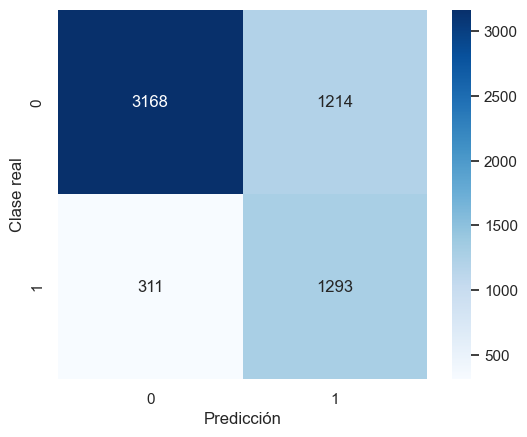

Resultados: 
	accuracy: 0.745
	recall: 0.806
	precision: 0.516
	f1_score: 0.629


In [48]:
pred = GS.predict(X)
show_results(y, pred)

___Answer:___

What we can see in the graph is that 3168 data were correctly predicted as acquiring the value 0 (true negatives) and 1214 data were predicted as 1 being 0 (false positives).
In this same way, 1293 data were predicted as 1 being 1 (true positives) and 311 data were predicted as 0 being 1 (false negatives).
Thus we also observe that as a result we obtain an accuracy of 0.745 (which is a relatively high value), a recall of 0.806, a precision of 0.516 (which is somewhat low) and an f1 of 0.629.

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> Classification threshold</font>


In the logistic regression model, for example $c_\theta(x)=1$ if $h_\theta(x)>0.5$. It is possible to change this threshold (0.5), and with this the properties of the classifier are modified. This is applicable to all models that return probability. In this section, we will see how this change affects us using 3 thresholds: 0.25, 0.5, and 0.75.

<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i> For simplicity, we will not include this process in the _Pipeline_.
</div>

In [49]:
y_prob = churn_pipe_logr.predict_proba(X)[:,1]

In [50]:
y_prob

array([0.36614309, 0.30713792, 0.64230542, ..., 0.09729552, 0.3085814 ,
       0.32210507])

* $c_\theta(x)=1$ si $h_\theta(x) >= 0.25$

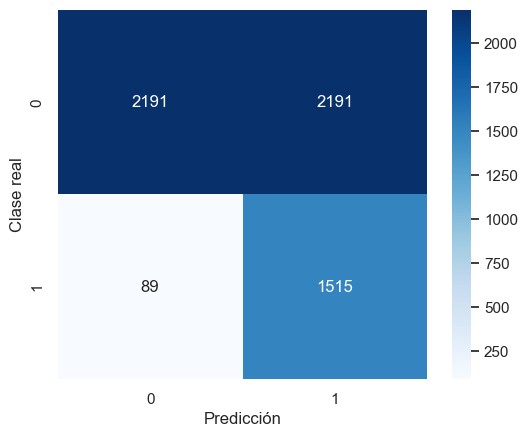

Resultados: 
	accuracy: 0.619
	recall: 0.945
	precision: 0.409
	f1_score: 0.571


In [51]:
y_pred = y_prob >= 0.25
show_results(y, y_pred)

* $c_\theta(x)=1$ si $h_\theta(x) >= 0.5$

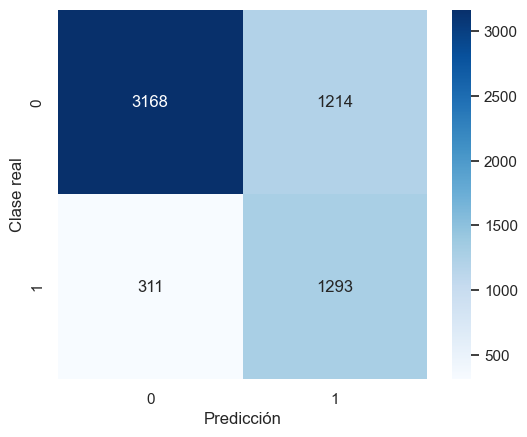

Resultados: 
	accuracy: 0.745
	recall: 0.806
	precision: 0.516
	f1_score: 0.629


In [52]:
y_pred = y_prob >= 0.5
show_results(y, y_pred)

* $c_\theta(x)=1$ si $h_\theta(x) >= 0.75$

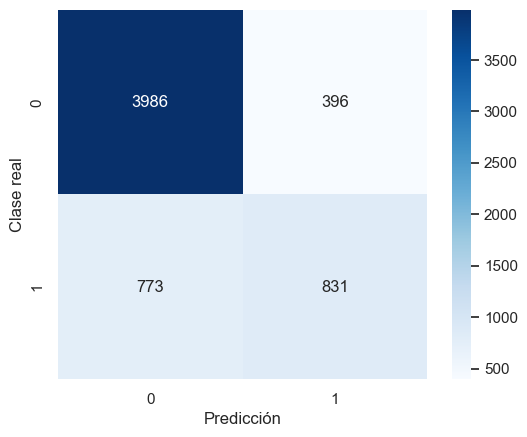

Resultados: 
	accuracy: 0.805
	recall: 0.518
	precision: 0.677
	f1_score: 0.587


In [53]:
y_pred = y_prob >= 0.75
show_results(y, y_pred)

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 16</font>

How does changing the threshold influence the different metrics? Because?

___Answer:___ From the previous graphs and results, it can be seen that as h0(x) increases, so do the accuracy and pressure values, while recall decreases. F1_score, being the average between recall and precision, varies its value in relation to these two parameters and increases or decreases depending on how much they have increased or decreased.

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 17</font>

Draw the _precision/recall_ curve using `sklearn.metrics.precision_recall_curve`. Is there a more appropriate threshold for this case? What factor would it depend on?



Umbrales considerados: 		 [0.006  0.006  0.0061 ... 0.9312 0.9329 0.9343]
Predicciones (valores únicos):   [0.0027 0.0027 0.0028 ... 0.9312 0.9329 0.9343]


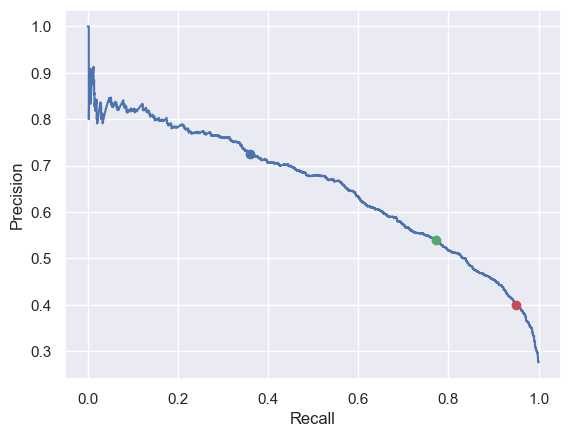

In [54]:
from sklearn.metrics import precision_recall_curve

#
#
precision, recall, thresholds = precision_recall_curve(y_true=y, probas_pred=y_prob)
plt.plot(recall,precision)
#

plt.plot(recall[2000],precision[2000], 'or'); # Umbral = 0.227, rojo
plt.plot(recall[3500],precision[3500], 'og'); # Umbral = 0.5, verde
plt.plot(recall[5000],precision[5000], 'ob'); # Umbral = 0.805, azul
plt.xlabel('Recall')
plt.ylabel('Precision');

print("Umbrales considerados: \t\t", np.round(thresholds,4))
print("Predicciones (valores únicos):  ", np.round(np.unique(y_prob),4))

___Respuesta:___

Prediction being the fraction between true positives and all samples marked as positive (TP/TP+FP) and recall being the fraction between positive samples and positive samples added to false negatives (TP/TP+FN). As precision increases, recall decreases, and the ideal is for the curve to be as close as possible to the upper right corner. A high recall means that most churning customers can be identified but can be identified along with non-churning customers. A high precision would identify the class of Churn=1 customers with very high confidence but would leave some Churn=1 out of the positive classification. In our case we are interested in the model classifying the positive data as such since in this way the company would know which customers are going to abandon and can try to avoid this abandonment, and we do not really care that some samples are classified as positive being negative since if a customer was not going to leave the company, the fact that the company tries to prevent them from leaving will not change the initial result, so it is important to have a high recall so that the majority of positive classes are classified as such. It should be noted that in the event that when prioritizing recall the precision drops too much (as in the case of the red threshold) and then we would have too many samples classified incorrectly, so the green threshold would be ideal since it prioritizes recall but does not have a precision as low as red. The images explain both concepts:
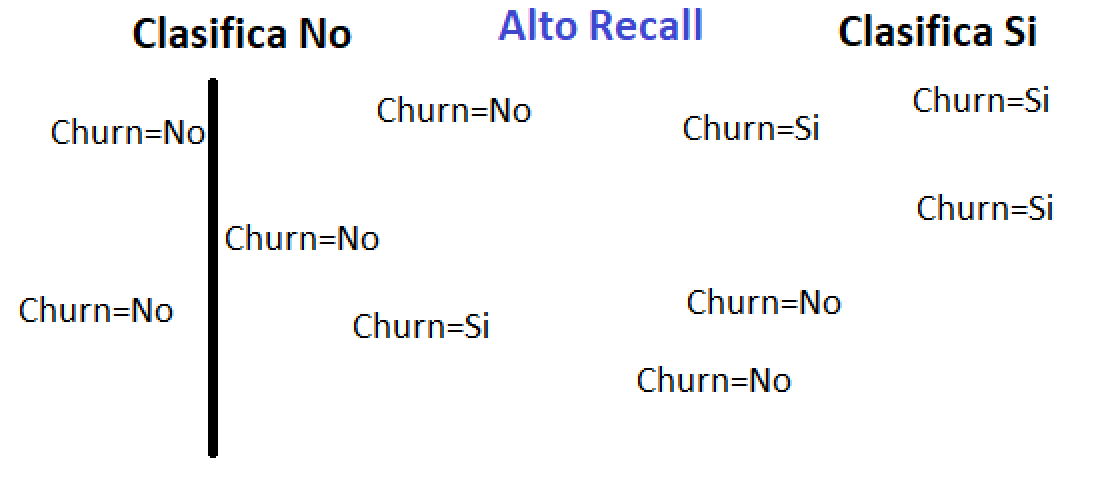
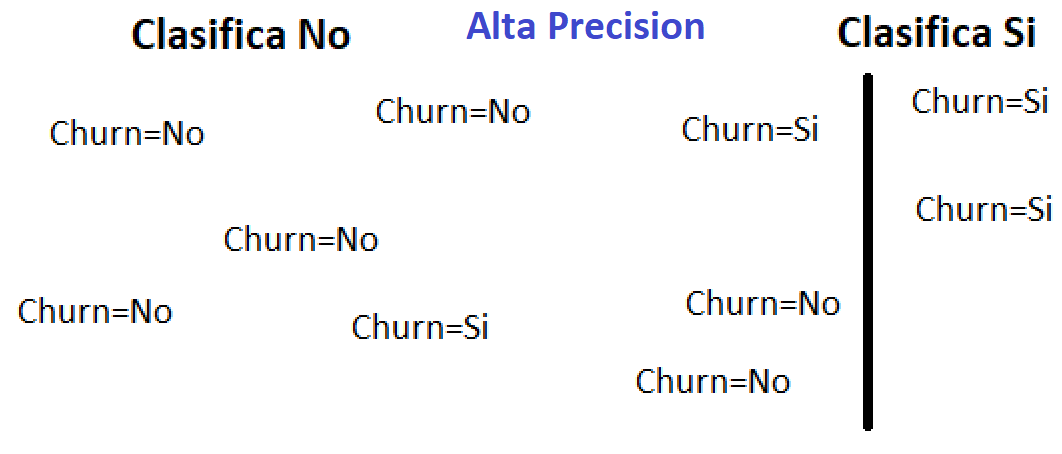

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---


<a id="section13"></a>
## <font color="#00586D"> 1.3 Validation on new data </font>
<br>



In this process, the model has been built, and the complete workflow is available, which is composed of a preparation of the original database using `preprocess_data`, and the_Pipeline_`churn_pipe_logr`.

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 18</font>

Use both to predict churn in `df_churn_new`. A threshold from those selected above can also be used. Show the results.


In [55]:
df_churn_new['Churn'] = (df_churn_new['Churn']=='Yes').astype(int) #Cambiamos el tipo de datos a enteros para la clase
preprocess_data(df_churn_new, churn_data_prep_pipeline) #preprocesamos los datos de test
X_new = df_churn_new.drop('Churn',axis=1) #separamos la variable clase del resto
y_new = df_churn_new['Churn']
df_churn_new['Churn'].value_counts()

0    792
1    265
Name: Churn, dtype: int64

In [56]:
y_new.value_counts()

0    792
1    265
Name: Churn, dtype: int64

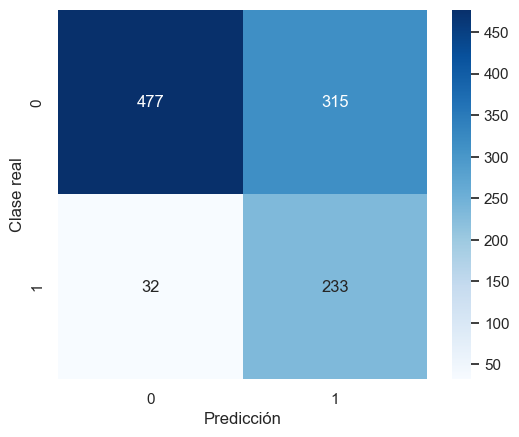

Resultados: 
	accuracy: 0.672
	recall: 0.879
	precision: 0.425
	f1_score: 0.573


In [57]:
pred_test = churn_pipe_logr.predict(X_new) #predecimos y_test con nuestro modelo

#show_results(y_test, pred_test) #mostramos los resultados sin aplicar el umbral

y_prob = churn_pipe_logr.predict_proba(X_new)[:,1]
pred_test = y_prob >= 0.227
show_results(y_new, pred_test)

#

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---


<a id="section14"></a>
## <font color="#00586D"> 1.4 Comparison with other </font> classifiers
<br>

Once the process is defined, the training will be repeated with other classifiers: A tree and a support vector machine.

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 19</font>

 Build a _Pipeline_ similar to the previous one, called `churn_pipe_tree`, but using a tree instead of a logistic regression model. Determine the best configuration of the parameters with `GridSearchCV`, using as `scoring` the measurement that you consider most appropriate. Save the resulting model to `churn_pipe_tree`. Show the results with respect to the new data set `X_new, y_new`.

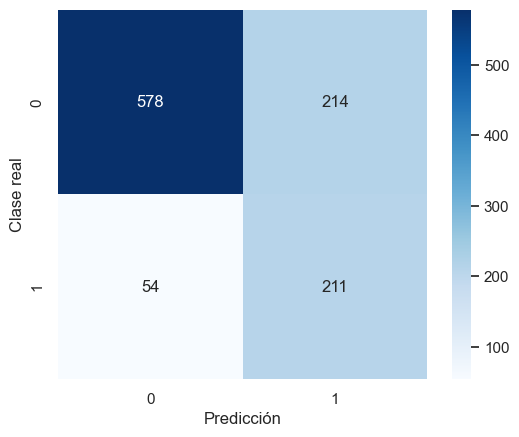

Resultados: 
	accuracy: 0.746
	recall: 0.796
	precision: 0.496
	f1_score: 0.612


In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_model = DecisionTreeClassifier();

churn_pipe_tree = Pipeline(steps=[('prep', churn_trans),
                                  ('clas', dt_model)])

parameters = {}
parameters['prep__num__imputer__strategy'] = ['mean', 'median']
parameters['clas__max_depth'] = [None, 3, 5, 7, 9]
parameters['clas__class_weight'] = [None, 'balanced']


#
GS = GridSearchCV(estimator=churn_pipe_tree, param_grid=parameters, scoring='recall', refit=True, cv=5)
#
GS = GS.fit(X, y)
churn_pipe_tree = GS.best_estimator_


#
pred = GS.predict(X_new)
show_results(y_new, pred)
#

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 20</font>

Draw the _Precision/Recall_ curve also with respect to the new data.




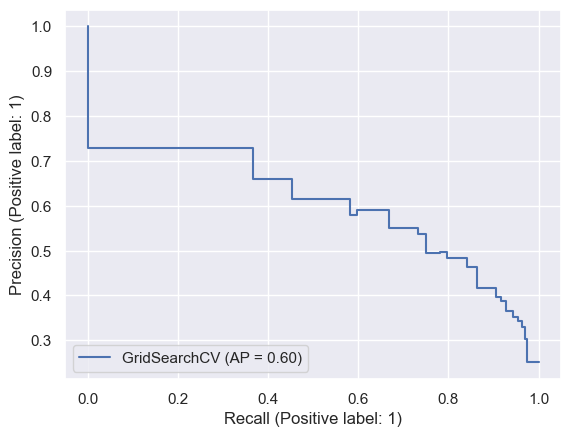

In [59]:
from sklearn.metrics import PrecisionRecallDisplay

#
#precision, recall, _ = precision_recall_curve(y_new, pred)
#disp = PrecisionRecallDisplay.from_estimator(precision=precision, recall=recall)
PrecisionRecallDisplay.from_estimator(GS, X_new, y_new)
plt.show()
#

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 21</font>

How would we increase the precision to 0.75 (with respect to the data obtained in the previous exercise, with a threshold of 0.5)? Would it pay to do so?

___Answer:___

In this specific case, improving the precision of the model to 0.75 would mean a reduction of recall to a value below 0.3, which would mean that many of the positive samples are excluded from the positive classification, reducing the number of study samples.
In this case it would not compensate, since there is the possibility that the model classifies all the samples as negative and none as positive in order to increase precision.

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 22</font>

Build a _Pipeline_ similar to the previous one, called `churn_pipe_svc`, and that uses a support vector machine. Determine the best configuration of the parameters with `GridSearchCV`, using as `scoring` the measurement that you consider most appropriate. Save the resulting model to `churn_pipe_svc`. Show the results with respect to the new data set `X_new, y_new`.

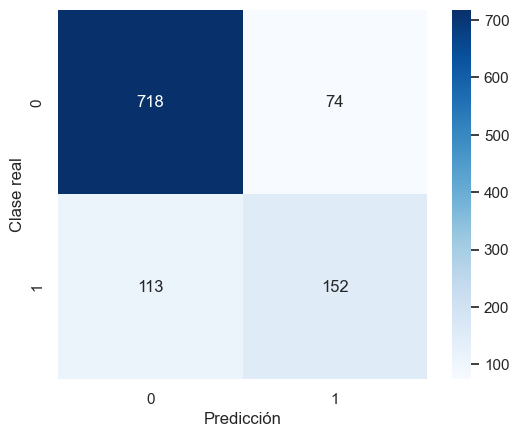

Resultados: 
	accuracy: 0.823
	recall: 0.574
	precision: 0.673
	f1_score: 0.619


In [60]:
from sklearn.svm import SVC

svm_model = SVC(probability=True);

churn_pipe_svc = Pipeline(steps=[('prep', churn_trans),
                                 ('clas', svm_model)])

parameters = {}
parameters['prep__num__imputer__strategy'] = ['mean', 'median']
parameters['clas__C'] = [10e-2, 1, 100]
parameters['clas__kernel'] = ['linear', 'rbf']

#
GS = GridSearchCV(estimator=churn_pipe_svc, param_grid=parameters, scoring='recall', refit=True, cv=5)
#
GS = GS.fit(X, y)
#

churn_pipe_svc = GS.best_estimator_

#
pred = GS.predict(X_new)
show_results(y_new, pred)
#

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 23</font>

Draw the _Precision/Recall_ curve also with respect to the new data.

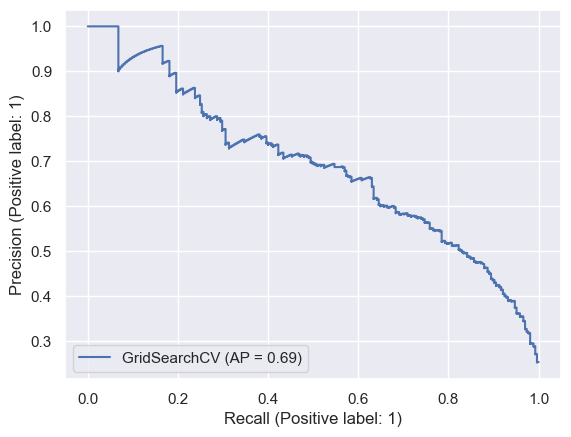

In [61]:
PrecisionRecallDisplay.from_estimator(GS, X_new, y_new)
plt.show()

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> Comparison of </font> models
<br>

As seen previously, the performance of each classification model depends on the threshold at which a prediction is considered positive. When comparing, the most convenient threshold for each one could be determined, and then use the results obtained.

The area under the ROC curve (AUC) provides a measure of performance considering all possible thresholds. It represents the probability that the model assigns a higher _score_ to a positive model than to a negative one, and is invariant with respect to this factor. That is why it is used for model comparison.

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 24</font>
Draw the ROC curve for the three models (use the new data). Which classifier is better?

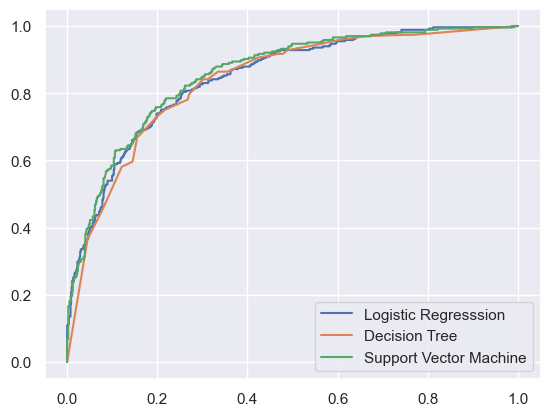

In [62]:
from sklearn.metrics import roc_curve

y_prob_logr = churn_pipe_logr.predict_proba(X_new)[:,1]
y_prob_tree = churn_pipe_tree.predict_proba(X_new)[:,1]
y_prob_svc = churn_pipe_svc.predict_proba(X_new)[:,1]

fpr, tpr, _ = roc_curve(y_new, y_prob_logr)
fpr1, tpr1, _1 = roc_curve(y_new, y_prob_tree)
fpr2, tpr2, _2 = roc_curve(y_new, y_prob_svc)

plt.plot(fpr, tpr, label='Logistic Regresssion')
plt.plot(fpr1, tpr1, label='Decision Tree')
plt.plot(fpr2, tpr2, label='Support Vector Machine')
plt.legend()
plt.show()

___Answer:___

The best classifier is the support vector machine, since it is the one with the largest area under the curve and therefore is the one with the greatest probability of being able to distinguish between positive and negative samples.

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 25</font>
Show the AUC for each of the classifiers. Does it correspond to what was expected?

In [63]:
from sklearn.metrics import roc_auc_score
print("Regresión logística: ",(roc_auc_score(y_new, y_prob_logr)))
print("Árbol de decisión: ",(roc_auc_score(y_new, y_prob_tree)))
print("Máquina de vectores de soporte: ",(roc_auc_score(y_new, y_prob_svc)))

Regresión logística:  0.845926243567753
Árbol de decisión:  0.83732132647227
Máquina de vectores de soporte:  0.8565990089574994


The results obtained correspond to what was expected and described above.

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section2"></a>
# <font color="#00586D"> 2. Predicting the potential value of a customer (_Customer Lifetime Value_)</font>
<br>

The potential value of a customer (_Customer Lifetime Value_ or _CLV_) allows you to determine the benefit that a client can provide over a period of time. In many cases, this value is a function of others, so it is possible to develop predictive models to carry out an estimate. This exercise starts with a data set called `Marketing-Customer-Value-Analysis.csv`, also obtained from the [IBM analytics] site (https://www.ibm.com/analytics) with data on CLV.
<br>


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> Unlike the previous task, in this case the preprocessing will be done in a simpler way (it is not necessary to do more), and the work will focus on the development and analysis of a regression model.
</div>

In [64]:
df_clv = pd.read_csv('data/clv/Marketing-Customer-Value-Analysis.csv', index_col=0)

print("Tamaño del conjunto de datos:  %d" % df_clv.shape[0])
print("Número de variables: %d" % df_clv.shape[1])
if df_clv.index.is_unique:
    print('El índice es único.')
else:
    print('Los índices están duplicados.')
    
# Visualiza las primeras instancias
df_clv.head()

Tamaño del conjunto de datos:  9134
Número de variables: 23
El índice es único.


,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


The names of the numeric columns of the _DataFrame_ are stored in a list called `num_df_columns`, and the rest in another called `dis_df_columns`.

In [65]:
dis_df_columns = df_clv.select_dtypes(exclude=np.number).columns.to_list()
num_df_columns = df_clv.select_dtypes(include=np.number).columns.to_list()

print('Discretas: ',dis_df_columns)
print('\nNuméricas: ',num_df_columns)

Discretas:  ['State', 'Response', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']

Numéricas:  ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']


First, we will proceed with the columns that contain discrete values. As before, it is advisable to see the number of values ​​that each one takes to verify that, in fact, the representation corresponds to the data. Next, the number of values ​​for each of the discrete variables is obtained and stored in a list called `num_values_dis_df_col`. Each element in the list must be a tuple with the name of the column and the number of variables.

In [66]:
num_values_dis_df_col = list(map(lambda col: (col,len(df_clv[col].value_counts())), dis_df_columns))
num_values_dis_df_col

[('State', 5),
 ('Response', 2),
 ('Coverage', 3),
 ('Education', 5),
 ('Effective To Date', 59),
 ('EmploymentStatus', 5),
 ('Gender', 2),
 ('Location Code', 3),
 ('Marital Status', 3),
 ('Policy Type', 3),
 ('Policy', 9),
 ('Renew Offer Type', 4),
 ('Sales Channel', 4),
 ('Vehicle Class', 6),
 ('Vehicle Size', 3)]

The `Effective To Date` column contains date data. These cannot be handled directly in `scikit-learn`. However, it is possible to convert them to integers that represent days since a given date. For example, the earliest that appears in the column.

In the next cell, the `Effective To Date` column is converted to `DateTime` format. Subsequently, the difference with the first date is calculated and converted to an integer (with `TimeDelta.dt.days`). Finally, the column is removed from `num_df_columns` and added to `dis_df_columns`.

In [67]:
df_clv['Effective To Date'] = pd.to_datetime(df_clv['Effective To Date'])

min_date = min(df_clv['Effective To Date'])
df_clv['Effective To Date'] = df_clv['Effective To Date'].apply(lambda date: date - min_date)
df_clv['Effective To Date'] = df_clv['Effective To Date'].dt.days

num_df_columns.append('Effective To Date')
dis_df_columns.remove('Effective To Date')

Because only two variables are binary, and for the sake of simplicity, they will all be treated as categorical.
<br>

Next, the numerical variables will be explored to find outliers.

In [68]:
df_clv[num_df_columns].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Effective To Date
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,28.837749
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,16.942769
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
1%,2230.433731,0.000000,61.000000,0.000000,1.000000,0.000000,1.000000,10.402835,0.000000
5%,2475.109047,0.000000,62.000000,1.000000,4.000000,0.000000,1.000000,52.261227,2.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,14.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,28.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,43.000000
95%,22064.361267,90374.350000,163.350000,33.000000,93.000000,3.000000,8.000000,960.115399,56.000000


It seems that only the class variable, `Customer Lifetime Value` could present _outliers_. To check whether these extreme values ​​correspond to an error or are part of the "phenomenon" that the variable represents, its distribution can be drawn.

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 26</font>
Plot the distribution of the variable `Customer Lifetime Value` with a `sns.distplot()`/`sns.kdeplot()` plot.

<AxesSubplot: xlabel='Customer Lifetime Value', ylabel='Density'>

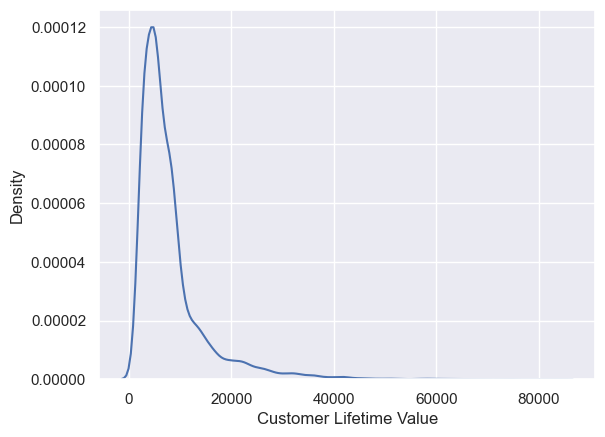

In [69]:
sns.kdeplot(df_clv["Customer Lifetime Value"])

It can be seen that the extreme values ​​are not anomalies or errors. However, the difference with the majority of values ​​is so great, and their proportion in the database is so small, that it is advisable not to include them in the model. Therefore, clients with a $CLV < 22000$ will be considered, that is, approximately 95%.

Once the types of the characteristics have been determined, and the extreme cases have been filtered, the training and test sets will be created.

In [70]:
from sklearn.model_selection import train_test_split

num_df_columns.remove('Customer Lifetime Value')
X = df_clv[df_clv['Customer Lifetime Value']<22000].drop('Customer Lifetime Value', axis=1)
y = df_clv.loc[df_clv['Customer Lifetime Value']<22000,'Customer Lifetime Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

To carry out the transformation, the same procedure as in the previous task will be used (the _Pipelines_ `num_transformer` and `cat_transformer`).

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 27</font>

Create a `ColumnTransformer` object that applies the _Pipeline_ transformation `num_transformer` to the columns in `num_df_colums`, the_Pipeline_` cat_transformer` to the columns in `dis_df_columns`. Name it `clf_trans`. (Both were created in the previous section).

In [71]:
clv_trans = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_df_columns),
        ('cat', cat_transformer, dis_df_columns)])

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Regarding prediction, a linear regression model will initially be used.

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 28</font>

Create a _Pipeline_ object, named `churn_pipe_linr` from `clv_trans` and a regression model, which will be stored in the variable `linr_ model`. Train it with the training data. Print the _score_ of the model for training and testing. What does this _score_ represent? What assessment could be made of it?

In [72]:
from sklearn.linear_model import LinearRegression

linr_model = LinearRegression();

churn_pipe_linr = Pipeline([('prep', clv_trans),
                 ('clas', linr_model)])


churn_pipe_linr.fit(X_train, y_train);

print("Entrenamiento:", churn_pipe_linr.score(X_train, y_train))
print("Test:", churn_pipe_linr.score(X_test,y_test))

Entrenamiento: 0.09326460364150424
Test: 0.07349141540848891


___Answer:___

This score represents the R2 metric for training and testing without the need for prediction (since this is automated by the method), and the information it offers us is the statistical measure of how well the predictions approximate the real data. In this case our score is very low and therefore the assessment that could be made is that the linear regression model does not fit the data and we must use another prediction model.

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

The `show_errors` function shows the mean absolute error with respect to the training and test data, and also a measure of the mean absolute relative error. Show errors related to the `churn_pipe_linr` model.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> The mean absolute relative error will be calculated here as:

$$
error_{rel} = \frac{\sum_{i=1}^m \frac{|\hat{y_i} - y_i|}{y_i}}{m}.
$$

<br>

We have expressly created this last measure to get an idea of ​​the magnitude of the error with respect to the_CLV_ of each user.
</div>

In [73]:
from sklearn.metrics import mean_absolute_error

def show_errors(y, y_pred):
    mae = mean_absolute_error(y, y_pred)
    rmae = np.sum(np.abs(y-y_pred)/y)/len(y)    
    print(f'\tEl error absoluto medio es: {mae:.2f}')
    print(f'\tEl error absoluto relativo medio es: {rmae:.2f}')

print('Entrenamiento')
y_pred = churn_pipe_linr.predict(X_train)
show_errors(y_train, y_pred)

print('Test')
y_pred = churn_pipe_linr.predict(X_test)
show_errors(y_test, y_pred)

Entrenamiento
	El error absoluto medio es: 2844.69
	El error absoluto relativo medio es: 0.49
Test
	El error absoluto medio es: 2822.10
	El error absoluto relativo medio es: 0.50


<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---


<a id="section21"></a>
## <font color="#00586D"> 2.1 Construction of a </font> regression tree
<br>



It can be seen that, as expected, the error is very high. Therefore, the previous procedure will be defined, but with a regression tree.


#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 29</font>

Create a _Pipeline_ named `churn_pipe_dtr`, similar to the previous one, but in which the predictive model is a regression tree. Train it and print its _score_ for training and testing.

In [74]:
from sklearn.tree import DecisionTreeRegressor


dtr_model = DecisionTreeRegressor(random_state=0);

churn_pipe_dtr = Pipeline([('prep', clv_trans),
                 ('clas', dtr_model)])

churn_pipe_dtr.fit(X_train, y_train);

print("Entrenamiento:", churn_pipe_dtr.score(X_train,y_train))
print("Test:", churn_pipe_dtr.score(X_test,y_test))

Entrenamiento: 1.0
Test: 0.702649059852204


<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

The following cell shows the mean absolute error (also the relative error) for training and testing:

In [75]:
print('Entrenamiento')
y_pred = churn_pipe_dtr.predict(X_train)
show_errors(y_train, y_pred)

print('Test')
y_pred = churn_pipe_dtr.predict(X_test)
show_errors(y_test, y_pred)

Entrenamiento
	El error absoluto medio es: 0.00
	El error absoluto relativo medio es: 0.00
Test
	El error absoluto medio es: 692.63
	El error absoluto relativo medio es: 0.07


On the other hand, the size of the tree obtained is:

In [76]:
print(f"Profundidad: {churn_pipe_dtr.named_steps['clas'].get_depth()}")
print(f"Número de hojas: {churn_pipe_dtr.named_steps['clas'].get_n_leaves()}")

Profundidad: 30
Número de hojas: 5278


#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 30</font>

What conclusion can be drawn from the results?

___Answer:___

The resulting score is 100% for the training data and lower for the test data (which is normal but the difference is 30%, which means a high difference). When we evaluate the absolute errors we see that with the training data there is no error and with the test data the error amounts to 692, having a number of leaves of 5278.

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

GS_pIn the previous case, the depth had not been limited, so the size of the resulting tree is very large.
 
#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 31</font>


The appropriate depth will then be determined using `GridSearchCV`. Create a similar_Pipeline_above, named `churn_pipe_dtr_p`. Use cross-validation of 5 partitions, and `neg_mean_absolute_error` as a measure of_scoring_. Store the resulting_Pipeline_in `churn_pipe_dtr_p`. Finally, print the _score_ ($R^2$) of the obtained model.

In [77]:
parameters = {}
parameters['clas__max_depth'] = [None, 2, 5, 10, 15, 20]

dtr_p_model = DecisionTreeRegressor(random_state=0);

churn_pipe_dtr_p = Pipeline(steps=[('prep', clv_trans),
                                   ('clas', dtr_p_model)])

GS_p = GridSearchCV(estimator=churn_pipe_dtr_p, param_grid=parameters, scoring='neg_mean_absolute_error', refit=True, cv=5)

GS_p.fit(X_train, y_train)
    
print("Mejor score: ", GS_p.best_score_)
print("Mejore configuración de parámetros: ", GS_p.best_params_)

churn_pipe_dtr_p = GS_p.best_estimator_

print("\nEntrenamiento:", churn_pipe_dtr_p.score(X_train,y_train))
print("Test:", churn_pipe_dtr_p.score(X_test,y_test))

Mejor score:  -725.3055980428136
Mejore configuración de parámetros:  {'clas__max_depth': 10}

Entrenamiento: 0.8893117529464726
Test: 0.7836483671865917


On the other hand, the size of the tree obtained is now:

In [78]:
print(f"Profundidad: {churn_pipe_dtr_p.named_steps['clas'].get_depth()}")
print(f"Número de hojas: {churn_pipe_dtr_p.named_steps['clas'].get_n_leaves()}")

Profundidad: 10
Número de hojas: 695


Mean absolute error (also the relative one) for training and testing:

In [79]:
print('Entrenamiento')
y_pred = churn_pipe_dtr_p.predict(X_train)
show_errors(y_train, y_pred)

print('Test')
y_pred = churn_pipe_dtr_p.predict(X_test)
show_errors(y_test, y_pred)

Entrenamiento
	El error absoluto medio es: 466.04
	El error absoluto relativo medio es: 0.05
Test
	El error absoluto medio es: 673.70
	El error absoluto relativo medio es: 0.07


<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 32</font>


Compare and analyze the results obtained with respect to those obtained previously.

___Answer:___

In this case we observe that the training score is lower than in the first regression tree model but the test score is higher and is not as far from the training score as in the first regression tree model, so Using this model could be more accurate. We also observe that the value of the mean absolute error for training increases and for testing decreases slightly with respect to the first model of the regression tree and the difference in absolute error between training and testing is lower for the last model. Thus, the number of leaves and depth have decreased compared to the first model, and the best score of the last model is -725, which is low since we would be looking for a value close to or greater than 0.

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section3"></a>
<font color="#00586D"> 3. Customer Segmentation</font>
<br>

When managing the customer relationship (_CRM_) it is necessary to take into account several factors. On the one hand, each client has peculiarities, and the relationship with them must be defined in a concrete way. On the other hand, the number of clients is high, and it is not possible to completely customize the way in which the relationship will be conducted. Because of this, one of the most common data science-related tasks in _CRM_ is segmentation, the objective of which is to create groups of customers with the same profile.
<br>

To address segmentation, _clustering_ algorithms are used. One of the peculiarities of these algorithms is that they lose usefulness when dealing with a very high number of variables. That is why they are usually used with small sets. A common type of analysis in this sense is the RFM (_Recency_, _Frequency_, _Monetary value_), in which customers are segmented based on when made their last transaction, how often they have transacted, and how much money they have spent in total.
<br>

In this task, we will start from a set of online sales data obtained in the [UCI] data set repository (https://archive.ics.uci.edu/ml/datasets/online+retail) (a subset of this). After a series of transformations, `KMeans` will be used to characterize the clusters.

The data set `data/segmentation/online12M.csv` is then read and saved in the `DataFrame` `df_ol`. The `InvoiceDate` column is treated as a timestamp.

In [80]:
# Carga los datos 
df_ol = pd.read_csv('data/segmentation/online12M.csv', index_col=0, parse_dates=['InvoiceDate']);

print("Tamaño del conjunto de datos:  %d" % df_ol.shape[0])
print("Número de variables: %d" % df_ol.shape[1])
if df_ol.index.is_unique:
    print('El índice es único.')
else:
    print('Los índices están duplicados.')
    
# Visualiza las primeras instancias
df_ol.head()

Tamaño del conjunto de datos:  68176
Número de variables: 8
El índice es único.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25,2.10,14286,United Kingdom
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20,1.45,16360,United Kingdom
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14,3.75,13933,United Kingdom
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23,2.10,17290,United Kingdom
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25,5.95,17663,United Kingdom


One of the columns that we are going to use (_Monetary Value_) refers to the total price spent per customer. The `Total` column stores the result of multiplying the price per unit of each purchase (`UnitPrice`) by the number of units (`Quantity`).

In [81]:
df_ol['Total'] = df_ol['Quantity']*df_ol['UnitPrice']
df_ol.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25,2.10,14286,United Kingdom,12.60
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20,1.45,16360,United Kingdom,1.45
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14,3.75,13933,United Kingdom,22.50
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23,2.10,17290,United Kingdom,2.10
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25,5.95,17663,United Kingdom,17.85


Next the `Recency, Frequency` and `MonetaryValue` columns will be created. To do this, the data must be grouped by client, and then make an aggregation based on the group on the columns:
*`InvoiceDat`. You must create a reference day (the one after the last one on the list) and subtract from it the last day (`max`) on which each customer purchased. The result:
* `TimeDelta` is returned in days (`.days`).* `InvoiceNo`. 
* The number of invoices is counted.
* `MonitaryValue`. The `Total` column is added for each group.

The information is then obtained according to the procedure described, and stored in the `DataFrame` `df_rfm`.

In [82]:
import datetime
dia_ref = max(df_ol['InvoiceDate']) + datetime.timedelta(days=1)

In [83]:
df_rfm = df_ol.groupby(['CustomerID']).agg({ 
    'InvoiceDate': lambda x: (dia_ref - x.max()).days, 
    'InvoiceNo': 'count',
    'Total': 'sum'})

df_rfm.rename(columns = {'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'Total': 'MonetaryValue'}, inplace=True)

df_rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747,3,25,948.70
12748,1,888,7046.16
12749,4,37,813.45
12820,4,17,268.02
12822,71,9,146.15


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> A higher `Recency` value implies that the customer's last purchase occurred longer ago.
</div>

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 33</font>

Draw the distribution of each of the variables using `sns.kdeplot()` on a graph $1 \times 3$ figure.

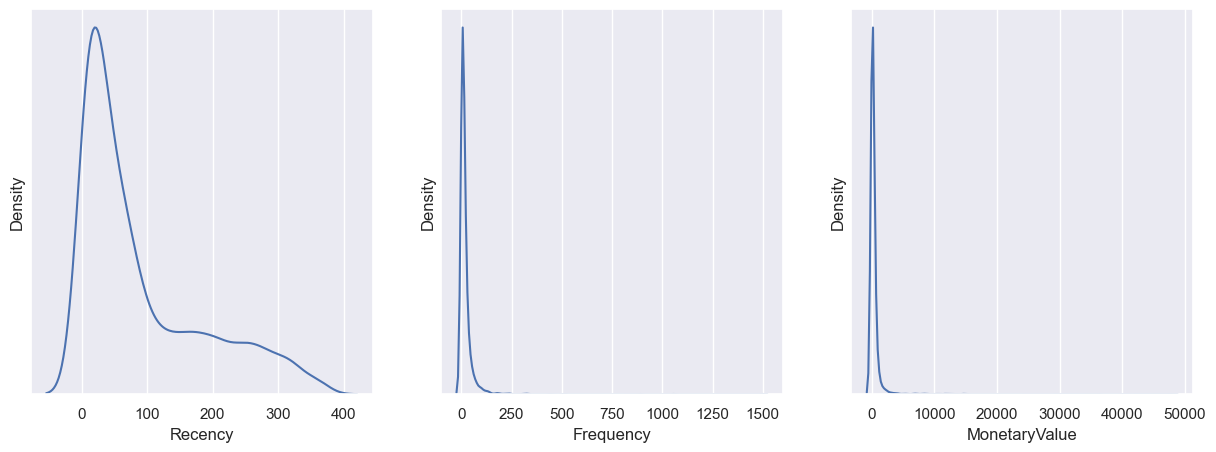

In [84]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
features = ['Recency', 'Frequency','MonetaryValue']
for col, ax in enumerate(axs.flatten()):
    col_name = features[col]
    sns.kdeplot(data = df_rfm, x = col_name, ax = ax)
    ax.set_yticks([])

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

It can be seen that the distributions are very skewed. This poses a problem for the `KMeans` algorithm that builds clusters by distance. One way to solve this is to use the logarithm of the variables. The result is stored in the `DataFrame` `dt_rfm_log`.

In [85]:
df_rfm_log = np.log(df_rfm)

**The difference in scales is also a problem**, since intrinsically, it makes the calculation of distances more important to the variables with the greatest range. Because of this, it is necessary to standardize the data. The result is stored in the *DataFrame* `df_rfm_norm`.

In [86]:
df_rfm_norm = df_rfm_log - df_rfm_log.mean()
df_rfm_norm = df_rfm_norm / df_rfm_log.std()
df_rfm_norm.describe()

,Recency,Frequency,MonetaryValue
count,3.643000e+03,3.643000e+03,3.643000e+03
mean,-5.900060e-17,2.252750e-16,3.588797e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.814131e+00,-1.794485e+00,-4.092988e+00
25%,-6.373074e-01,-6.490904e-01,-6.578277e-01
50%,9.266763e-02,2.092218e-02,-1.489601e-02
75%,8.339256e-01,7.209827e-01,6.692029e-01
max,1.547663e+00,4.246243e+00,4.458854e+00


Once the data is prepared, the clustering procedure can be carried out. The `KMeans` algorithm takes as its most important parameter `k`, which corresponds to the number of clusters. When there is no a priori information, the cost curve is drawn as a function of `k`. Because a compromise is sought between a low cost and a reduced number of clusters, the value of `k' is taken from which the decrease is smaller. This method is known as _elbow method_.

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 34</font>

Run `KMeans` for values ​​1 to 15 on the data set `df_rfm_norm`. Storing the resulting cost (`KMeans.inertia_`) for each value of `k` in the `cost` dictionary.

In [87]:
from sklearn.cluster import KMeans

cost = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(df_rfm_norm)
    #print(kmeans.inertia_)
    cost[k] = kmeans.inertia_
    #cost.append(kmeans.inertia_)
    #

In [88]:
cost

{1: 10926.000000000038,
 2: 5772.171213433188,
 3: 4420.549837624144,
 4: 3641.508788590045,
 5: 3078.9624064731856,
 6: 2755.2682463228275,
 7: 2493.2541132583456,
 8: 2289.340198235593,
 9: 2141.04267602178,
 10: 2014.9198919727407,
 11: 1875.464046451082,
 12: 1756.1829709770502,
 13: 1677.2814545329313,
 14: 1605.17191642281}

In [89]:
kmeans.labels_

array([ 8,  3,  8, ..., 10,  3,  5])

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 35</font>
 
 Draw the cost function (use `cost.keys()` and `cost.values()`).

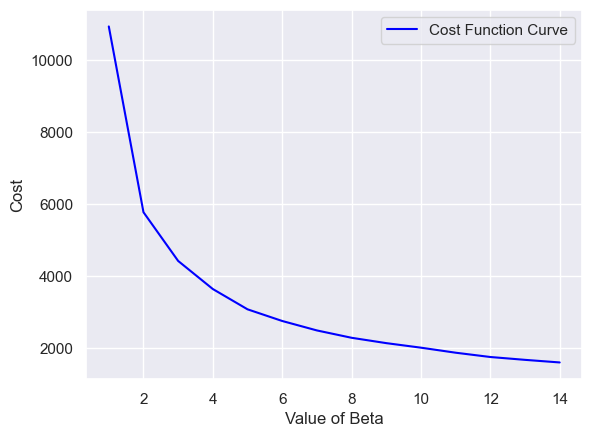

In [90]:
#
plt.plot(cost.keys(), cost.values(), color = 'blue', label = 'Cost Function Curve')
plt.xlabel('Value of Beta')
plt.ylabel('Cost')
plt.legend()
# 

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

It seems that starting with $k=4$ the decrease is smaller.

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 36</font>

Perform grouping with `k=4`.

In [91]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans = kmeans.fit(df_rfm_norm)
# COMPLETAR

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

In order to analyze each group, we will work with the data from `df_rfm` (we could even work with the initial set if necessary). Next, a column called `Group` with the label corresponding to the cluster (`KMeans.labels_`) is added to each entry of `df_rfm `.

In [92]:
df_rfm = df_rfm.assign(Group = kmeans.labels_)
df_rfm.head()

,Recency,Frequency,MonetaryValue,Group
CustomerID,,,,
12747,3,25,948.70,0
12748,1,888,7046.16,0
12749,4,37,813.45,0
12820,4,17,268.02,0
12822,71,9,146.15,1


#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 37</font>

Get the mean per group for each of the columns of `df_rfm` (except `Group`, obviously). Store the result in `df_clusters_mean`.
 

<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i> This gives us the centroids, but with respect to the original set. `kmeans.cluster_centers_` would give us that information, but with respect to the normalized logarithm of the data. Which is not representative in order to describe the groups.
</div>

In [93]:
#
df_clusters_mean = df_rfm.groupby("Group").mean()
#

In [94]:
df_clusters_mean

,Recency,Frequency,MonetaryValue
Group,,,
0,19.475449,53.742515,1129.977401
1,129.379689,11.797804,231.814584
2,19.507171,10.348110,145.583978
3,165.422996,2.604430,44.169061


<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

A simple way to visualize the data is to divide the mean values ​​of each group by the means of each column for the total information. This would return the relative importance of each variable in each cluster.

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 38</font>
  Perform this operation and store the result in `relative_imp`. Subtract 1 from the result so that a value of 0 corresponds to the average of each column (there is no difference between the group and the total).
  
  <font size=2 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font> In the previous exercise, the means were obtained for each column/group, and they were stored in `df_clusters_mean`. In this, the average of each column of `df_rfm` must be calculated, which gives rise to a *Series* with three elements. The division of the *DataFrame* by the *Series* is done by *Broadcasting*, so each of the rows is divided. One must be subtracted from the result.

In [95]:
relative_imp = df_clusters_mean.divide(df_rfm.mean(axis=0).drop('Group'))-1
relative_imp

,Recency,Frequency,MonetaryValue
Group,,,
0,-0.784648,1.871743,2.048272
1,0.430627,-0.369582,-0.374648
2,-0.784298,-0.447046,-0.607267
3,0.829179,-0.860832,-0.880848


<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 39</font>

Draw a heat map with the data from `relative_imp`. Use annotations with `.2f` format and the `RdYlGn` color map.

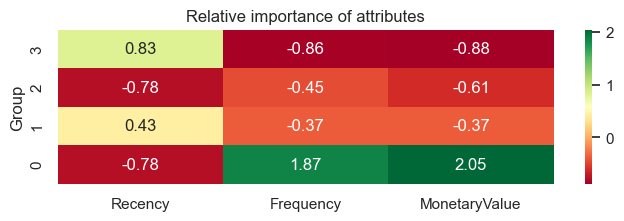

In [96]:
plt.figure(figsize=(8, 2))
plt.title('Relative importance of attributes')
#
sns.heatmap(relative_imp, annot=True, fmt=".2f", cmap= "RdYlGn")
#
plt.gca().set_ylim(0,4);

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Exercise 40</font>

What characterizes each group? Provide a description of them.

___Answer:___

We observe that groups 1 and 3 have a positive recency (higher in group 3) and a negative frequency and MonetaryValue (lower in group 3). Groups 0 and 2 have the same value for recency but group 1 has positive and high values ​​for frequency and monetaryValue.
- Group 0: this is a group that classifies clients who register a high number of invoices in a short period.
- Group 1: classifies the group of clients that in an average period of time (neither the longest nor the shortest that the data has) registers an average number of invoices (neither the highest nor the lowest amount that is have data)
- Group 2: This is the group that records a low number of invoices in the shortest period of time.
- Group 3: Classifies the group of clients that in a very long period of time classifies a very low number of invoices

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<div align="right">
<a href="#indice"><font size=6 color="#00586D"><i class="fa fa-coffee" aria-hidden="true"></i></font></a>
</div>